In [1]:
# Permutasjonstest

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

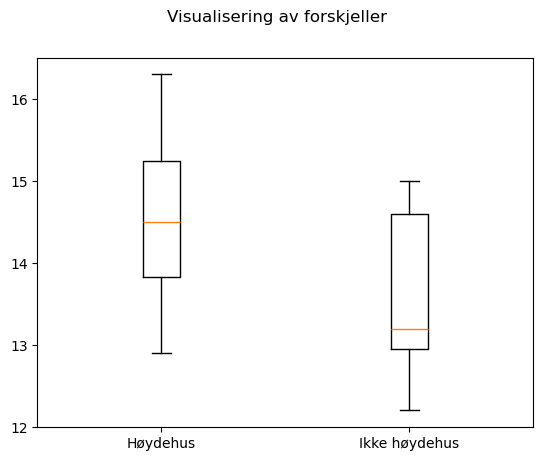

In [35]:
# Data
xA = [16.3, 15.4, 14.2, 13.7, 14.8, 12.9]
xB = [15.0, 14.3, 14.9, 13.2, 12.2, 13.1, 12.8]

# Plott
fig, axs = plt.subplots(1,1)
fig.suptitle('Visualisering av forskjeller')
xData = [xA, xB]
hmm = axs.boxplot(xData, tick_labels = ["Høydehus", "Ikke høydehus"])

In [37]:
# Regn ut forskjell i gjennomsnitt
meanA = np.mean(xA)
meanB = np.mean(xB)
print("Gjennomsnitt A: ", round(meanA,2), sep = "")
print("Gjennomsnitt B: ", round(meanB,2), sep = "")
u = meanA-meanB
print("Forskjell i gjennomsnitt: ", round(u,2), sep="")

Gjennomsnitt A: 14.55
Gjennomsnitt B: 13.64
Forskjell i gjennomsnitt: 0.91


p-verdi (95% CI): 0.112±0.003


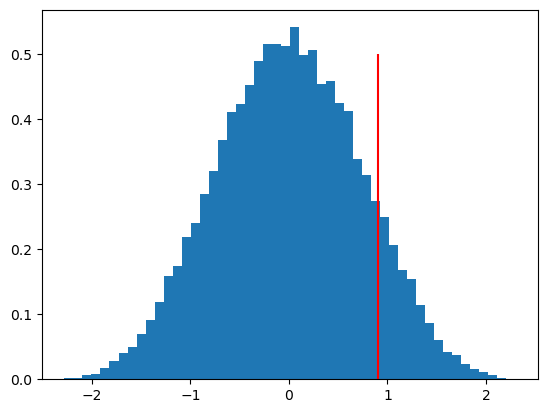

In [38]:
# Sjekk exchangeability
# NB: Her kunne man gjort testen eksakt i stedet for å simulere
xAll = np.concatenate((xA,xB))
B = 50000
uSample = np.zeros(B)
for b in range(B):
    np.random.shuffle(xAll)
    xAnew = xAll[1:6]
    xBnew = xAll[7:13]
    uSample[b] = np.mean(xAnew)-np.mean(xBnew)

# Plot
h = plt.hist(uSample, 50, density = True)
plt.vlines([u], 0, 0.5, 'r')

# Estimer p-verdi
pHat = np.mean(uSample>=u)
print("p-verdi (95% CI): ", round(pHat,3), "±", round(1.960*np.sqrt(pHat*(1-pHat)/B), 3), sep = "")